In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Titanic_train.csv')

In [3]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [7]:
df.drop('Cabin',axis=1,inplace=True)

In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [11]:
df.duplicated().sum()

0

In [12]:
le=LabelEncoder()

In [13]:
df['Sex']=le.fit_transform(df['Sex'])

In [14]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True,dtype=int)

In [15]:
df.drop('Name',axis=1,inplace=True)

In [16]:
df['Tickets']=df['Ticket'].apply(lambda x: str(x).split()[-1])
df['Tickets']=pd.to_numeric(df['Tickets'],errors='coerce')

In [17]:
df.drop('Ticket',axis=1,inplace=True)

In [18]:
df

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    1  22.0      1      0   7.2500   
1              2         1       1    0  38.0      1      0  71.2833   
2              3         1       3    0  26.0      0      0   7.9250   
3              4         1       1    0  35.0      1      0  53.1000   
4              5         0       3    1  35.0      0      0   8.0500   
..           ...       ...     ...  ...   ...    ...    ...      ...   
886          887         0       2    1  27.0      0      0  13.0000   
887          888         1       1    0  19.0      0      0  30.0000   
888          889         0       3    0  28.0      1      2  23.4500   
889          890         1       1    1  26.0      0      0  30.0000   
890          891         0       3    1  32.0      0      0   7.7500   

     Embarked_Q  Embarked_S    Tickets  
0             0           1    21171.0  
1             0           0    17599.0  
2             0           1  3101282.0  
3             0           1   113803.0  
4             0           1   373450.0  
..          ...         ...        ...  
886           0           1   211536.0  
887           0           1   112053.0  
888           0           1     6607.0  
889           0           0   111369.0  
890           1           0   370376.0  

[891 rows x 11 columns]

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S', 'Tickets'],
      dtype='object')

<Axes: >

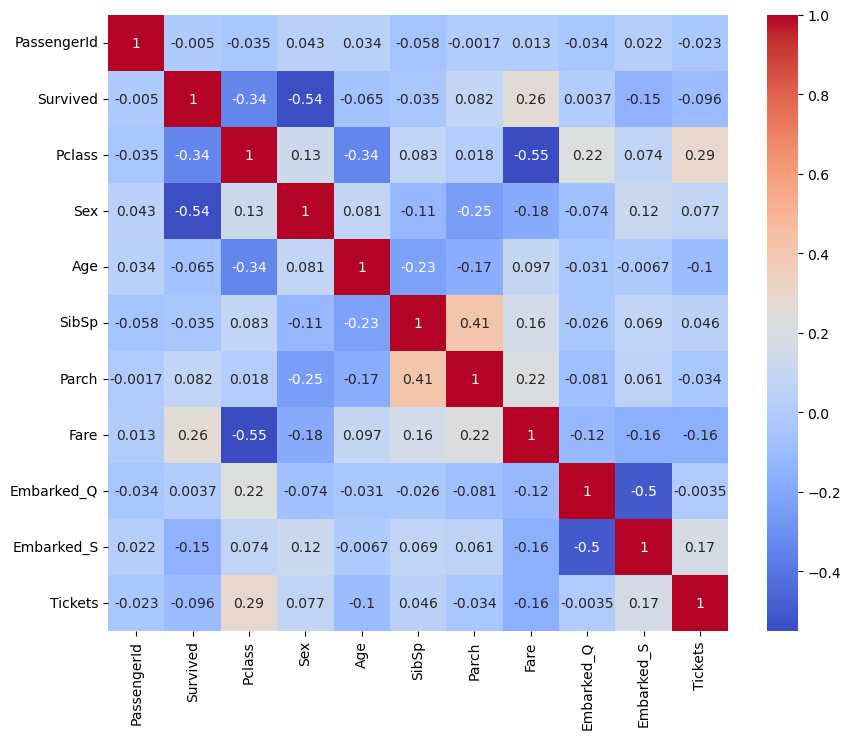

In [20]:
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)

In [21]:
from scipy.stats.mstats import winsorize

In [22]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.5)
outlier = iso.fit_predict(df.select_dtypes(include='number'))
df = df[outlier == 1]

In [23]:
for col in df.select_dtypes(include='number').columns:
    df[col]=winsorize(df[col],limits=[0.05,0.05])

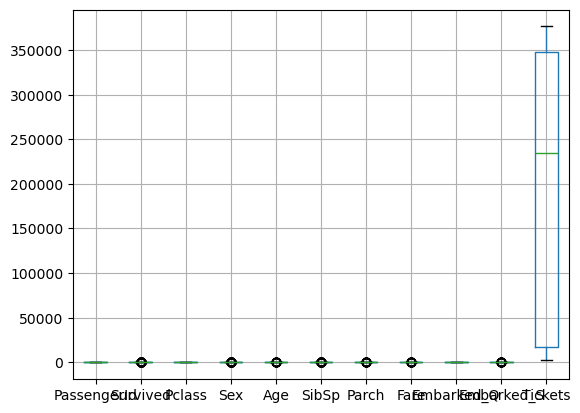

In [24]:
df.boxplot()
plt.show()

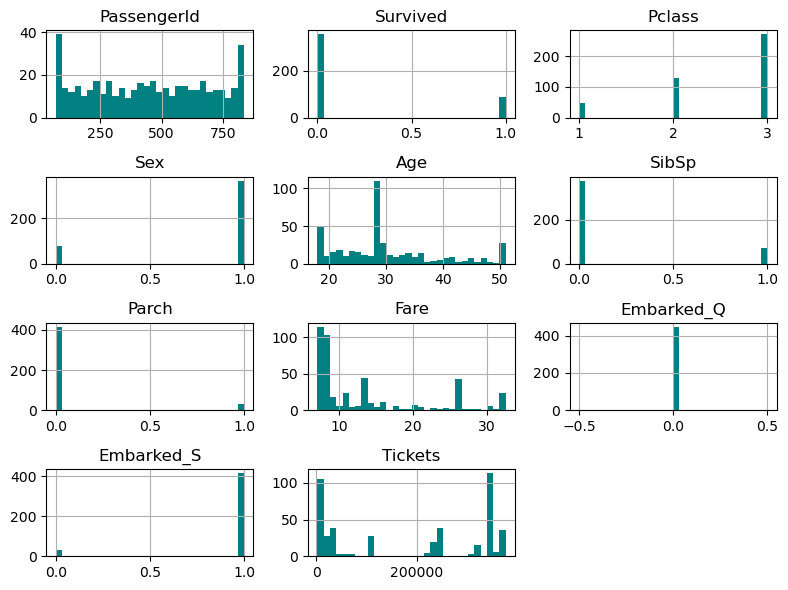

In [25]:
num_col=df.select_dtypes(include='number').columns
df[num_col].hist(figsize=(8,6),bins=30,color='teal')
plt.tight_layout()
plt.show()

In [26]:
std=StandardScaler()

In [27]:
df[['Age','Fare','Tickets']]=std.fit_transform(df[['Age','Fare','Tickets']])

In [28]:
df.drop('PassengerId',axis=1,inplace=True)

In [29]:
df['SibSp']=df['SibSp'].astype(int)

In [30]:
df.drop(['Parch','Embarked_Q'],axis=1,inplace=True)

In [31]:
df.head()

Survived  Pclass  Sex       Age  SibSp      Fare  Embarked_S   Tickets
0          0       3    1 -0.905718      1 -0.781864           1 -1.072939
4          0       3    1  0.551979      0 -0.680652           1  1.239335
12         0       3    1 -1.129980      0 -0.680652           1 -1.194657
14         0       3    0 -1.354241      0 -0.705424           1  1.088080
17         1       2    1 -0.232935      0 -0.054400           1  0.392105

In [32]:
df['Tickets'].fillna(df['Tickets'].mean(),inplace=True)

In [33]:
target = df['Survived']
feature = df.drop(['Survived'],axis=1)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=150)
print(x_train.shape)
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)

(334, 7)
(334,)
(334, 7)
(112,)


In [35]:
model =LogisticRegression()

In [36]:
model.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8392857142857143

In [38]:
y_proc = model.predict_proba(x_test)[:,1]

In [39]:
fpr,tpr,thresholds = roc_curve(y_test,y_proc)

In [40]:
roc_auc= auc(fpr,tpr)

Text(0, 0.5, 'ROC Curve of tpr')

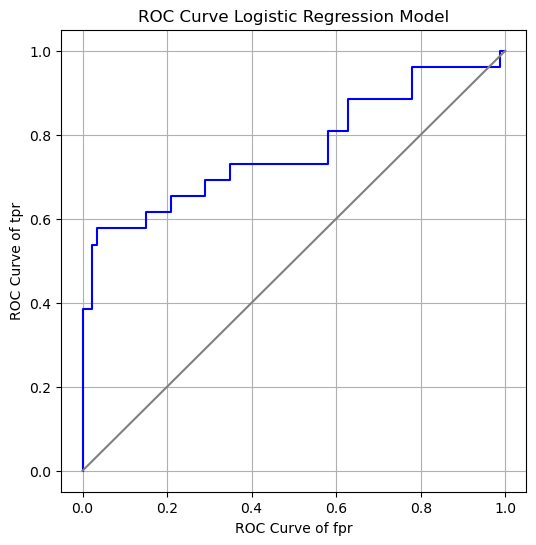

In [41]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue',label='ROC curve(AUC=%0.2f)'%roc_auc)
plt.grid()
plt.plot([0,1],[0,1],color='gray')
plt.title('ROC Curve Logistic Regression Model')
plt.xlabel('ROC Curve of fpr')
plt.ylabel('ROC Curve of tpr')

In [42]:
 import pickle

In [43]:
file='my_model.pkl'

In [44]:
pickle.dump(model,open(file,'wb'))

In [45]:
file

'my_model.pkl'

* Precision and recall
* well both are the metrix and the precision the prpoportion of correctly predicted positive cases out of all postive predictions made by the model
* Recall on the other hand measure the proportion of the actual positive cases that were correctly identified by the model
* And is metrix used for binary classification and its especialy used for imbalanced dataset

* cross_validation
* cross_validation is the model on multiple different parts of the dataset
* k-flod split data into k part,rotate test/training
* And is used for avoid overfiting test general performance
* And is best for small datasets,binary classification,imbalanced data